<a href="https://colab.research.google.com/github/FumitakaIwaki/bandit/blob/main/%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%A0%E8%AA%B2%E9%A1%8C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# プログラム
こちらを参考にしました
https://qiita.com/tsugar/items/b809f8d6399cc988aa69

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class Environment():
  def __init__(self, k, p):
    self.k = k
    self.p = p
  
  def draw(self, arm):
    randp = random.random()
    if randp > self.p[arm]:
      return 0.0
    else:
      return 1.0

In [ ]:
class EpsilonGreedy():
  def __init__(self, epsilon):
    self.epsilon = epsilon
  
  def action(self, values):
    if random.random() > self.epsilon:
      max_values = np.where(values == values.max())
      if  1 < len(max_values[0]):
        return random.choice(max_values[0])
      else:
        return np.argmax(values)
    else:
      return random.randrange(len(values))

In [ ]:
class Agent():
  def __init__(self, policy, counts, values):
    self.policy = policy
    self.counts = counts
    self.values = values
  
  def initialize(self, arms):
    self.counts = np.zeros(arms)
    self.values = np.zeros(arms)
  
  def select_arm(self):
    return policy.action(self.values)
  
  def update_reward(self, arm, reward):
    self.counts[arm] = self.counts[arm] + 1
    n = self.counts[arm]
    value = self.values[arm]
    new_value = value + 1/float(n) * (reward - value)
    self.values[arm] = new_value


In [ ]:
def run(num_step, num_sim):
  selected_arms = np.zeros([num_sim,  num_step])
  rewards = np.zeros([num_sim, num_step])
  sum_rewards = np.zeros(num_sim)
  regrets = np.zeros([num_sim, num_step])

  for sim in range(num_sim):
    agent.initialize(arms.k)
    for step in range(num_step):
      arm = agent.select_arm()
      selected_arms[sim, step] = arm
      reward = arms.draw(arm)
      rewards[sim, step] = reward
      sum_rewards[sim] = sum_rewards[sim] + reward

      if step != 0:
        regrets[sim, step] = regrets[sim, step-1] + np.max(arms.p) - arms.p[arm]
      else:
        regrets[sim, step] = regrets[sim, step] + np.max(arms.p) - arms.p[arm]

      agent.update_reward(arm, reward)
  
  ave_reward = np.sum(rewards, axis=0) / num_sim
  ave_regret = np.sum(regrets, axis=0) / num_sim
  return [rewards, regrets, selected_arms, sum_rewards, ave_reward, ave_regret]
    

# 　試行

In [ ]:
num_step = 1000
num_sim = 100
epsilon = [0.1, 0.01, 0]
arms = Environment(3, [0.3, 0.5, 0.7])

In [ ]:
results = []
for i in range(len(epsilon)):
  policy = EpsilonGreedy(epsilon[i])
  agent = Agent(policy, [], [])
  results.append(run(num_step, num_sim))

In [ ]:
a_rew = np.sum(results[0][0], axis=0) / num_sim

# 結果

In [ ]:
colors = ['blue', 'red', 'green']
labels = ['epsilon=0.1', 'epsilon=0.01', 'epsilon=0']

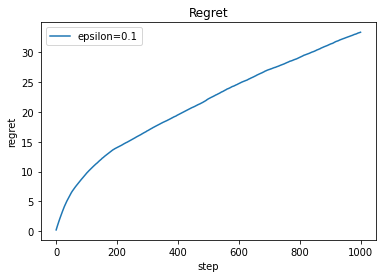

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('step')
ax.set_ylabel('regret')
ax.set_title('Regret')
ax.plot(results[0][5], label='epsilon=0.1')
ax.legend(loc="best")
plt.show()

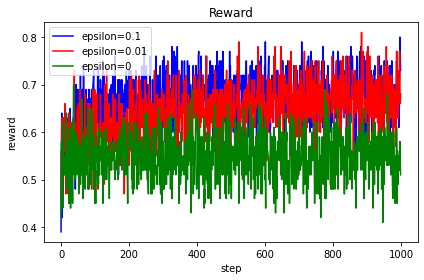

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('step')
ax.set_ylabel('reward')
ax.set_title('Reward')
for i in range(len(epsilon)):
  ax.plot(results[i][4], color=colors[i], label=labels[i])
ax.legend(loc="best")
fig.tight_layout()
plt.show()

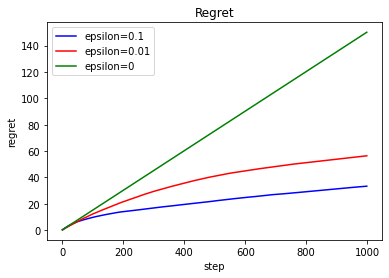

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('step')
ax.set_ylabel('regret')
ax.set_title('Regret')
for i in range(len(epsilon)):
  ax.plot(results[i][5], color=colors[i], label=labels[i])
ax.legend(loc="best")
plt.show()